# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [2]:
import numpy as np
import pandas as pd

# Challenge 1 - Iterators, Generators and `yield`. 

In iterator in Python is an object that represents a stream of data. However, iterators contain a countable number of values. We traverse through the iterator and return one value at a time. All iterators support a `next` function that allows us to traverse through the iterator. We can create an iterator using the `iter` function that comes with the base package of Python. Below is an example of an iterator.

In [3]:
# We first define our iterator:

iterator = iter([1,2,3])

# We can now iterate through the object using the next function

print(next(iterator))

1


In [4]:
# We continue to iterate through the iterator.

print(next(iterator))

2


In [5]:
print(next(iterator))

3


In [6]:
# After we have iterated through all elements, we will get a StopIteration Error

print(next(iterator))

StopIteration: 

In [ ]:
# We can also iterate through an iterator using a for loop like this:
# Note: we cannot go back directly in an iterator once we have traversed through the elements. 
# This is why we are redefining the iterator below

iterator = iter([1,2,3])

for i in iterator:
    print(i)

In the cell below, write a function that takes an iterator and returns the first element in the iterator and returns the first element in the iterator that is divisible by 2. Assume that all iterators contain only numeric data. If we have not found a single element that is divisible by 2, return zero.

In [ ]:
def divisible2(iterator):
    print([i for i in iterator if i % 2 == 0])
    # This function takes an iterable and returns the first element that is divisible by 2 and zero otherwise
    # Input: Iterable
    # Output: Integer
    
    # Sample Input: iter([1,2,3])
    # Sample Output: 2

    # Your code here:
divisible2(iter([1,2,3]))


### Generators

It is quite difficult to create your own iterator since you would have to implement a `next` function. Generators are functions that enable us to create iterators. The difference between a function and a generator is that instead of using `return`, we use `yield`. For example, below we have a function that returns an iterator containing the numbers 0 through n:

In [7]:
def firstn(n):
    number = 0
    while number < n:
        yield number
        number = number + 1

If we pass 5 to the function, we will see that we have a iterator containing the numbers 0 through 4.

In [8]:
iterator = firstn(5)
for i in iterator:
    print(i)

0
1
2
3
4


In the cell below, create a generator that takes a number and returns an iterator containing all even numbers between 0 and the number you passed to the generator.

In [9]:
# This function produces an iterator containing all even numbers between 0 and n

# Input: integer
# Output: iterator

# Sample Input: 5
# Sample Output: iter([0, 2, 4])

# Your code here:

def even_iterator(n):
    number=0
    while number < n:
        if number%2 ==0:
            yield number
        number = number + 1



In [10]:
iterator = even_iterator(5)

for i in iterator:
    print(i)

0
2
4


# Challenge 2 - Applying Functions to DataFrames

In this challenge, we will look at how to transform cells or entire columns at once.

First, let's load a dataset. We will download the famous Iris classification dataset in the cell below.

In [97]:
columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width','iris_type']
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=columns)

Let's look at the dataset using the `head` function.

In [98]:
# Your code here:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,iris_type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Let's start off by using built-in functions. Try to apply the numpy mean function and describe what happens in the comments of the code.

In [54]:
l = iris["sepal_length"].tolist()


import numpy as np




for x in range(10,15):
    l[x] = np.nan

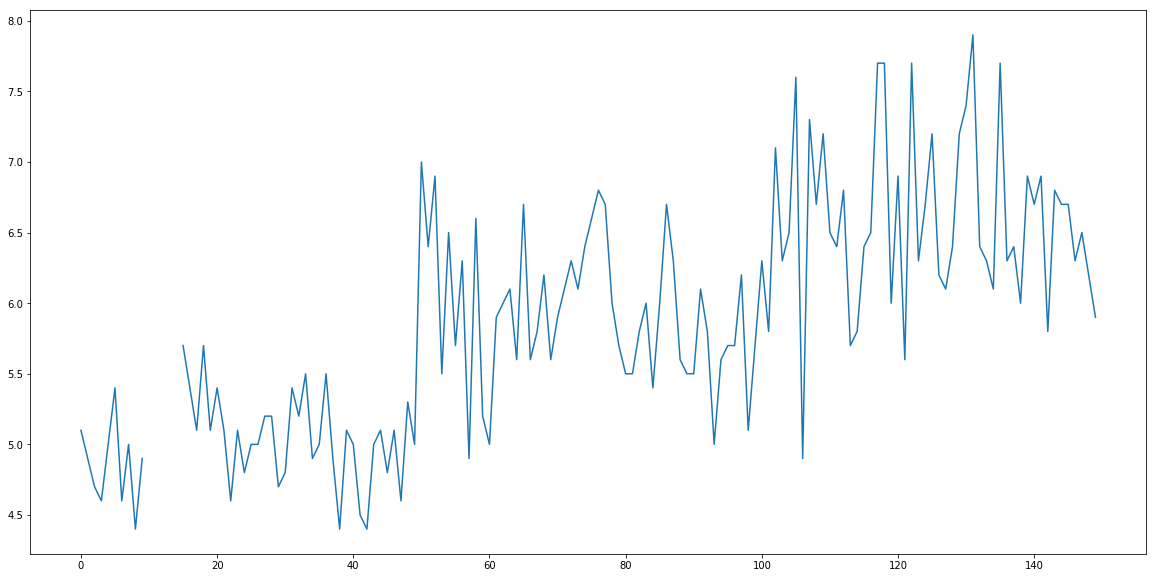

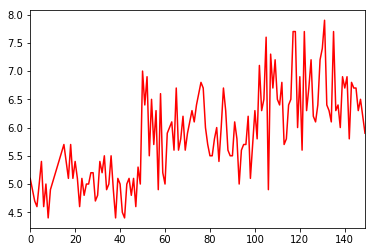

In [61]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
plt.plot(list(range(len(l))), l)
plt.show()


serie = pd.Series(l)


serie.interpolate().plot(color='red')
plt.show()

In [76]:
iris.mean(axis=0).to_dict()


def compute_mean_bi(df):
    dict_cols_means = df.mean(axis=0).to_dict()
    return dict_cols_means

compute_mean_bi(iris)



def compute_mean_by_hand(df):
    # Init empty dictionnary
    dict_cols_means = {}
    # Iterate over columns
    for col in df.columns:

        # pd.Series --> list
        list_from_col = df[col].tolist()
        
        sum_ = sum(list_from_col)
        
        length = len(list_from_col) 
    
        mean = sum_ / length
        
        dict_cols_means[col] = mean
        
    
    return(dict_cols_means)
        

    
    # ligne abjecte
iris_num = pd.concat([iris[col] for col in iris.columns if type(iris[col].iloc[0])==np.float64],axis=1)
compute_mean_by_hand(iris_num)



iris_num = iris.copy()

for col in iris_num:
    if not iris_num[col].dtype == np.float64:
        iris_num.drop(col, inplace=True, axis=1)

In [1]:
iris_num

NameError: name 'iris_num' is not defined

In [81]:
iris_num = iris.copy()

iris_num.drop(col, axis=1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [80]:
iris_num

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [68]:
for col in iris.columns:
    print(type(iris[col].iloc[0])==int)

False
False
False
False
False


In [13]:
# Your code here:
def mean(a):
    # compute means of columns of dataframe a
    yield(np.mean(a))
iterator = mean(iris)
for i in iterator:
    print(i)
    #print(i[0])

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64


In [14]:
def means(df):
    v = pd.DataFrame(df.mean()).reset_index()
    v.columns = ['Columns','Mean']
    return v
c = means(iris)
c

,Columns,Mean
0,sepal_length,5.843333
1,sepal_width,3.054000
2,petal_length,3.758667
3,petal_width,1.198667


Next, we'll apply the standard deviation function in numpy (`np.std`). Describe what happened in the comments.

In [15]:
# Your code here:
def std(a):
    #compute std of columns of dataframe a
    yield(np.std(a))
itera = std(iris)
for i in itera:
    print(i)
    #print(i[0])


sepal_length    0.825301
sepal_width     0.432147
petal_length    1.758529
petal_width     0.760613
dtype: float64


In [16]:
p = pd.DataFrame(np.std(iris)).reset_index()
p.columns = ['Column', "Std"]
p


,Column,Std
0,sepal_length,0.825301
1,sepal_width,0.432147
2,petal_length,1.758529
3,petal_width,0.760613


The measurements are in centimeters. Let's convert them all to inches. First, we will create a dataframe that contains only the numeric columns. Assign this new dataframe to `iris_numeric`.

In [99]:
# Your code here:
iris_numeric = iris._get_numeric_data()
iris_numeric

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Next, we will write a function that converts centimeters to inches in the cell below. Recall that 1cm = 0.393701in.

In [18]:
def cm_to_in(x):
    # This function takes in a numeric value in centimeters and converts it to inches
    # Input: numeric value
    # Output: float
    
    # Sample Input: 1.0
    # Sample Output: 0.393701
    
    # Your code here:
    return x*0.393701
cm_to_in(1)

0.393701

Now convert all columns in `iris_numeric` to inches in the cell below. We like to think of functional transformations as immutable. Therefore, save the transformed data in a dataframe called `iris_inch`.

In [19]:
iris_inch = pd.DataFrame(cm_to_in(iris_numeric))
iris_inch

,sepal_length,sepal_width,petal_length,petal_width
0,2.007875,1.377954,0.551181,0.078740
1,1.929135,1.181103,0.551181,0.078740
2,1.850395,1.259843,0.511811,0.078740
3,1.811025,1.220473,0.590552,0.078740
4,1.968505,1.417324,0.551181,0.078740
5,2.125985,1.535434,0.669292,0.157480
6,1.811025,1.338583,0.551181,0.118110
7,1.968505,1.338583,0.590552,0.078740
8,1.732284,1.141733,0.551181,0.078740
9,1.929135,1.220473,0.590552,0.039370


We have just found that the original measurements were off by a constant. Define the global constant `error` and set it to 2. Write a function that uses the global constant and adds it to each cell in the dataframe. Apply this function to `iris_numeric` and save the result in `iris_constant`.

In [20]:
# Define constant below:
error =2

def add_constant(x):
    # This function adds a global constant to our input.
    # Input: numeric value
    # Output: numeric value
    
    # Your code here:
    return x+error
iris_constant = add_constant(iris_numeric)
iris_constant


,sepal_length,sepal_width,petal_length,petal_width
0,7.1,5.5,3.4,2.2
1,6.9,5.0,3.4,2.2
2,6.7,5.2,3.3,2.2
3,6.6,5.1,3.5,2.2
4,7.0,5.6,3.4,2.2
5,7.4,5.9,3.7,2.4
6,6.6,5.4,3.4,2.3
7,7.0,5.4,3.5,2.2
8,6.4,4.9,3.4,2.2
9,6.9,5.1,3.5,2.1


# Bonus Challenge - Applying Functions to Columns

Read more about applying functions to either rows or columns [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) and write a function that computes the maximum value for each row of `iris_numeric`

In [21]:
# Your code here:
def max_row(df):
    return df.apply(np.max, axis=1)
s = pd.DataFrame(max_row(iris_numeric))
s.columns = ['Max value']
s

,Max value
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
5,5.4
6,4.6
7,5.0
8,4.4
9,4.9


Compute the combined lengths for each row and the combined widths for each row using a function. Assign these values to new columns `total_length` and `total_width`.

In [ ]:
iris

In [108]:
# Your code here:
def len_wid(df):
    
    # combining the 2 length columns and computing sum in a dataframe
    # naming the new column
    length = df[['sepal_length', 'petal_length']]
    combined_lengths = pd.DataFrame(length.apply(np.sum, axis=1))
    combined_lengths.columns = ['total_length']
    
    # combining the 2 width columns and computing sum in a dataframe
    # naming the new column
    width = df[['sepal_width', 'petal_width']]
    combined_widths = pd.DataFrame(width.apply(np.sum, axis=1))
    combined_widths.columns = ['total_width']
    return pd.concat([combined_widths, combined_lengths], axis=1)

#pd.concat([iris_numeric,len_wid(iris_numeric)], axis=1)
#iris_numeric['total_width'] = iris_numeric.apply(lambda x: x['sepal_width']+x['petal_width'], axis=1)
#iris_numeric

def sumcol(df, col1, col2):
    return df.apply(lambda x: x[col1]+x[col2], axis=1)
    
iris_numeric['total_width'] = sumcol(iris_numeric, 'sepal_width', 'petal_width')
#iris_numeric['total_length'] = sumcol(iris_numeric, 'sepal_length', 'petal_length')
iris_numeric

,sepal_length,sepal_width,petal_length,petal_width,total_width,total_length
0,5.1,3.5,1.4,0.2,3.7,6.5
1,4.9,3.0,1.4,0.2,3.2,6.3
2,4.7,3.2,1.3,0.2,3.4,6.0
3,4.6,3.1,1.5,0.2,3.3,6.1
4,5.0,3.6,1.4,0.2,3.8,6.4
5,5.4,3.9,1.7,0.4,4.3,7.1
6,4.6,3.4,1.4,0.3,3.7,6.0
7,5.0,3.4,1.5,0.2,3.6,6.5
8,4.4,2.9,1.4,0.2,3.1,5.8
9,4.9,3.1,1.5,0.1,3.2,6.4
